Link colab to google drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import all the necessary libraries

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data Cleaning

Import the txt file from google drive and do some data cleaning

In [ ]:
os.listdir()
amount = []
date   = []
with open('/content/gdrive/MyDrive/MDA Sem 3/MDA 5402 Visual Analytics Systems Architecture/Assignment 1/AssignmentOne.txt') as f: 
#with open('Assignment One.txt', 'r') as f: 
    for i in f:
        try:
          #split the data into 2 columns separated by a huge space
            j = i.split("       ")
            #on the first column, replace the number with a wrong format to the write one and remove any uncecessary characters such as comas(,),next line(\n), and extra spaces in the data
            x = j[0].replace("484.","484,").replace(",","").replace("\n","").replace(" ","")
            
            #2nd column: replace the wrong dates with the right ones and remove any uncecessary characters such as next line(\n), and extra spaces in the data
            y = j[-1].replace("5/01/2020","5/01/2021").replace("5/02/2020","5/02/2021").replace("\n","").replace(" ","")
            amount.append(x)
            date.append(y)
        except:
            print(i)
    
amount = [i if len(i)>4 else np.nan for i in amount]
date = [i if len(i)>4 else np.nan for i in date]
n = 7
date = date[n:]
amount = amount[n:]

    #print(f.read())
    
for i in zip(amount,date):
  print(i)
  pass

('2741822.65', '30/08/2019')
('2760952.50', '19/9/2019')
('2691884.55', '20/09/2019')
('2702387.20', '1/10/2019')
('2602387.20', '1/10/2019')
('2608013.05', '7/10/2019')
('2508013.05', '7/10/2019')
('2535708.25', '7/11/2019')
('2465708.25', '7/11/2019')
('2524678.05', '13/01/2020')
('2454678.05', '13/01/2020')
('2478684.25', '10/02/2020')
('2388684.25', '10/02/2020')
('2428842.05', '27/03/2020')
('2366386.65', '30/3/2020')
('2381245.30', '17/04/2020')
('2281245.30', '17/04/2020')
('2300786.60', '11/05/2020')
('2200786.60', '11/05/2020')
('2219218.80', '4/06/2020')
('2099218.80', '4/06/2020')
('2102142.90', '8/06/2020')
('1999142.90', '8/06/2020')
('2020398.70', '8/07/2020')
('1920398.70', '8/07/2020')
('1926609.30', '17/07/2020')
('1836609.30', '17/07/2020')
('1848950.15', '5/08/2020')
('1813950.15', '5/08/2020')
('1817738.75', '11/08/2020')
('1757738.75', '11/08/2020')
('1771223.25', '02/09/2020')
('1686223.25', '02/09/2020')
(nan, nan)
('1686223.25', '02/09/2020')
('1566223.25', '02/

# Data Manipulation

Convert the date column into a datetime format and the amount column into float

In [ ]:
data = pd.DataFrame({"Amount":amount,
                    "Date":date})
data['Date'] = pd.to_datetime(data['Date'],format = "%d/%m/%Y")
data['Amount'] = [float(i) for i in data['Amount']]
data.head(50)

,Amount,Date
0,2741822.65,2019-08-30
1,2760952.50,2019-09-19
2,2691884.55,2019-09-20
3,2702387.20,2019-10-01
4,2602387.20,2019-10-01
5,2608013.05,2019-10-07
6,2508013.05,2019-10-07
7,2535708.25,2019-11-07
8,2465708.25,2019-11-07
9,2524678.05,2020-01-13


Create a column that will have the difference between the current and the previous balance hence show payments made per date

In [ ]:
x = []
for i in range(len(data.Amount)):
    try:
        a = data['Amount'][i]
        b = data['Amount'][i+1]
        x.append(a-b)
        #print(i)
    except:
        print(i)
data.shape
x = [0]+x
data['Payment'] = x
data.head(20)

85


,Amount,Date,Payment
0,2741822.65,2019-08-30,0.00
1,2760952.50,2019-09-19,-19129.85
2,2691884.55,2019-09-20,69067.95
3,2702387.20,2019-10-01,-10502.65
4,2602387.20,2019-10-01,100000.00
5,2608013.05,2019-10-07,-5625.85
6,2508013.05,2019-10-07,100000.00
7,2535708.25,2019-11-07,-27695.20
8,2465708.25,2019-11-07,70000.00
9,2524678.05,2020-01-13,-58969.80


Create two additional columns, Charge and Payment 1 

*   Charge - any negative amount which we assume to be charges for missing repayment
*   Payment1 - positive amounts which we assume to be repayments made


In [ ]:
import numpy as np
data['charge'] = [i-1 if i<0 else 0 for i in data['Payment']]
data['Payment1'] = [i if i>=0 else np.nan for i in data['Payment']]
data['smooth'] = [i+j for i,j in zip(data['Amount'],data['charge'])]
data

,Amount,Date,Payment,charge,Payment1,smooth
0,2741822.65,2019-08-30,0.00,0.00,0.00,2741822.65
1,2760952.50,2019-09-19,-19129.85,-19130.85,NaN,2741821.65
2,2691884.55,2019-09-20,69067.95,0.00,69067.95,2691884.55
3,2702387.20,2019-10-01,-10502.65,-10503.65,NaN,2691883.55
4,2602387.20,2019-10-01,100000.00,0.00,100000.00,2602387.20
...,...,...,...,...,...,...
81,388525.85,2021-10-04,-699.15,-700.15,NaN,387825.70
82,288525.85,2021-10-04,100000.00,0.00,100000.00,288525.85
83,288733.30,2021-10-06,-207.45,-208.45,NaN,288524.85
84,188733.30,2021-10-06,100000.00,0.00,100000.00,188733.30


# Data Visualization

Visualize trend of repayments on a line plot 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


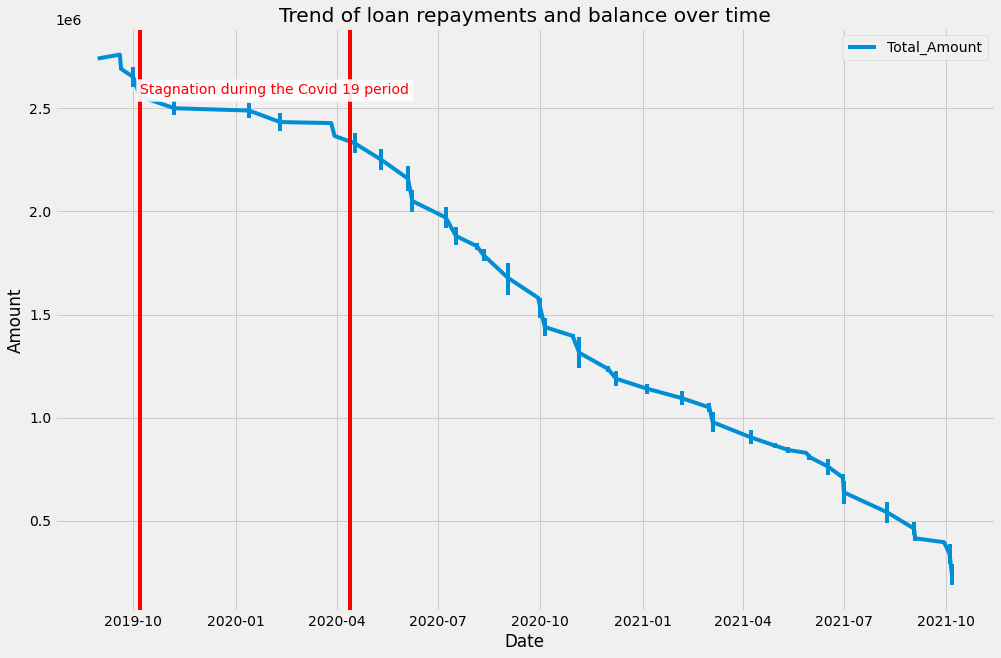

In [ ]:
import matplotlib.pyplot as plt;import seaborn as sns
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,10))
sns.lineplot(data['Date'],data['Amount'],label = "Total_Amount", err_style='bars').set(title='Trend of loan repayments and balance over time')
#sns.lineplot(data['Date'],data['smooth'],label = "smoothed")
#sns.lineplot(data['Date'],data['charge'],label = "Amount_paid")

label_list = [
    (pd.to_datetime("2019-10-07"), 'Stagnation during the Covid 19 period', 'r'),
    (pd.to_datetime("2020-04-13"), "", 'r')
]

ax = plt.gca()

for date_point, label, clr in label_list:
    plt.axvline(x=date_point, color=clr)
    plt.text(date_point, ax.get_ylim()[1]-300000, label,
             horizontalalignment='left',
             verticalalignment='center',
             color=clr,
             bbox=dict(facecolor='white', alpha=0.9))


plt.show()

Create a bar plot of charges and payment1


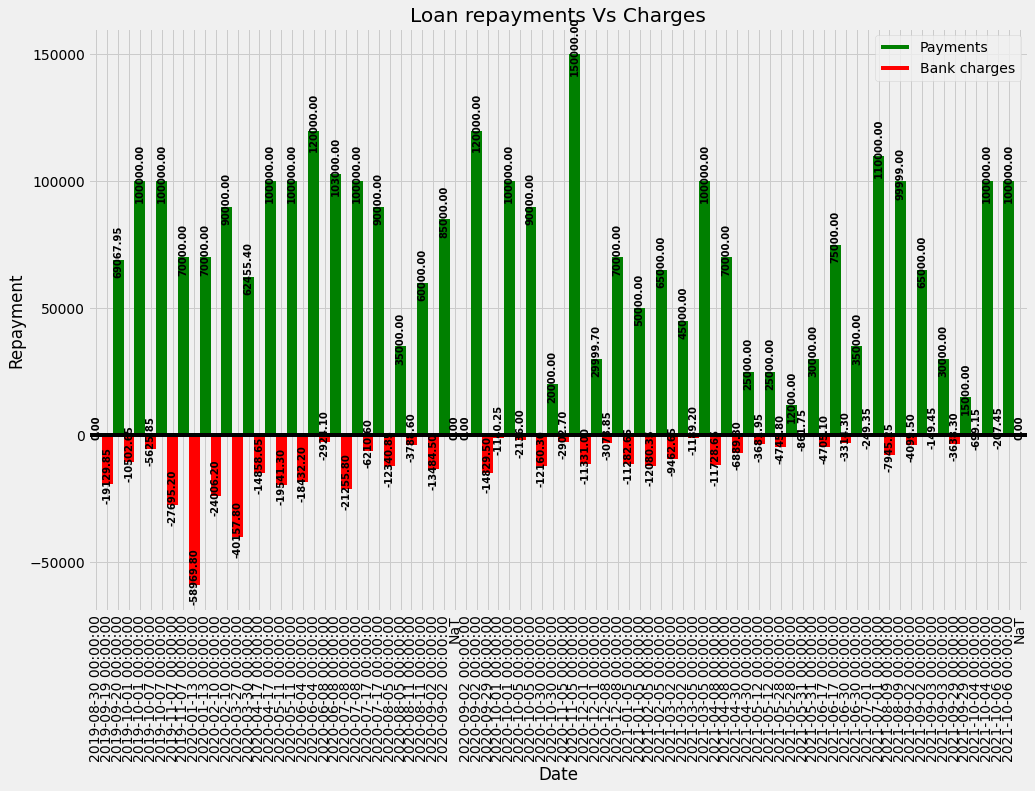

In [ ]:
#create a dummy column for whether the observation is larger than 0
from matplotlib.lines import Line2D
data['positive'] = data['Payment'] > 0
# custom_lines = [Line2D([0], [0], color="green", lw=4
#                       ),
#                 Line2D([0], [0], color="red", lw=4
#                       ),
#                 ]
fig, ax = plt.subplots(figsize=(15, 10))

# plots=data[["Payment","Date"]].dropna().plot(kind = "bar",x = "Date",y = "Payment",ax = ax, 
#                                              width=1, 
#                                              color=data.positive.map({True: 'g', False: 'r'}),
#                                              ylabel = "Repayment",
#                                              title="Loan repayments Vs Charges")
plots = data.plot(kind = "bar",x = "Date",y = "Payment",color=data.positive.map({True: 'g', False: 'r'}),ax = ax,width=1,
         ylabel = "Repayment",title="Loan repayments Vs Charges")
plt.axhline(0,color = "black")
plt.legend(data.positive.map({True: 'Payment1', False: 'Charges'}))

my_dict = {}
x = (range(len(my_dict)))
new_x = [3*i for i in x]
plt.bar(new_x, my_dict.values(), align='center', width=0.8)

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, rotation=90, weight='bold', xytext=(0, 8),
                   textcoords='offset points')



ax.legend(custom_lines, ['Payments', 'Bank charges'])

plt.show()

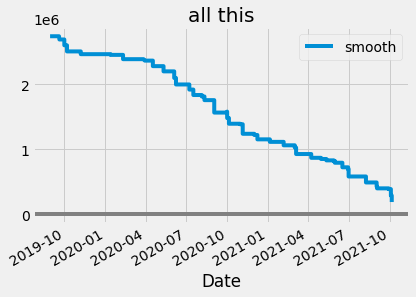

In [ ]:
fig, ax = plt.subplots()
data.plot(x = "Date",y = "smooth",ax=ax)
plt.axhline(0,color = "grey")
arrow_properties ={'facecolor':'black',
                  'shrink':0.1,
                  'headlength':10,
                  'width':2}
# plt.annotate("Drinking age was changed to 21",
#             xy = (1984,24762),
#             xytext = (1984,30000),
#             arrowprops = arrow_properties)
plt.title("all this")
plt.show()

Basic statistical details

In [ ]:
data.head()
data.describe()

,Amount,Payment,charge,Payment1,smooth
count,8.400000e+01,83.000000,86.000000,42.000000,8.400000e+01
mean,1.444064e+06,30760.112651,-5040.391860,71107.667857,1.438904e+06
std,7.493014e+05,48715.767238,9567.097456,35202.973381,7.456981e+05
min,1.887333e+05,-58969.800000,-58970.800000,0.000000,1.887333e+05
25%,8.285188e+05,-6549.950000,-6065.412500,37500.000000,8.283026e+05
50%,1.387941e+06,0.000000,0.000000,70000.000000,1.386489e+06
75%,2.099950e+06,70000.000000,0.000000,100000.000000,2.099218e+06
max,2.760952e+06,150000.000000,0.000000,150000.000000,2.741823e+06


In [ ]:
#observations
# took 2  years to pay a 2 million loan
# the payments were reducing balance
# the average loan payment was 70K

In [ ]:
# questions(cost of loans in Kenya)
# look at the data and create a narrative and plot the data
# intro, what makes the project unique,how it works, unique selling point
#1. intro
#2. amount, date paid (payment schedule) - can be done in groups of two or three
# what the group members did